In [32]:
import torch
import torchvision
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch.nn as nn
from torchvision.transforms import transforms
import torch.nn.functional as F

In [33]:
#hyper parameters:
input_size=784   #28X28 pixel of image

hidden_size1=200 #size of 1st hidden layer
hidden_size2=150 #size of second hidden layer

output =10       #output layer, number of classes

num_epoch = 2
bach_size=100
lr_rate=0.01

In [34]:
#start data loading
train_dataset=torchvision.datasets.MNIST('./data',train=True,transform=transforms.ToTensor(),download=True)
test_dataset=torchvision.datasets.MNIST('./data',train=False,transform=transforms.ToTensor(),download=False)

train_dataloader=torch.utils.data.DataLoader(dataset=train_dataset,batch_size=bach_size,shuffle=True)
test_dataloader=torch.utils.data.DataLoader(dataset=test_dataset,batch_size=bach_size,shuffle=False)

In [35]:
# check status of training data
data=iter(train_dataloader)
samples,labels=next(data)
print(f"number of samples{samples.shape}")
print(f"number of labels {labels.shape}")

# check number of train/test data
print(len(train_dataloader))
print(len(test_dataloader))

number of samplestorch.Size([100, 1, 28, 28])
number of labels torch.Size([100])
600
100


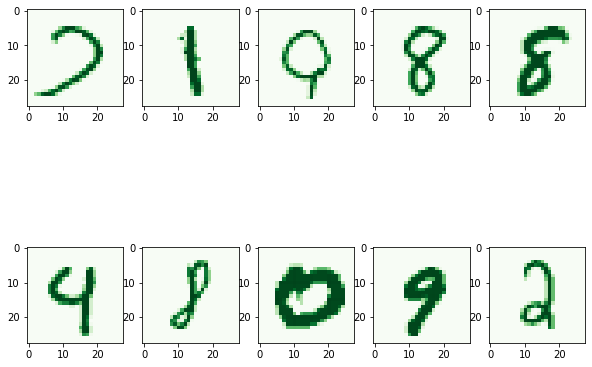

In [36]:
plt.figure(figsize=(10,8))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(samples[i][0],cmap='Greens')
plt.show()

In [37]:
#define neural network
class MyMLP1(nn.Module):
    def __init__(self,input_size,hidden_size1,hidden_size2,output):
        super().__init__()
        self.f_connected1=nn.Linear(input_size,hidden_size1)
        self.f_connected2=nn.Linear(hidden_size1,hidden_size2)
        self.out_connected=nn.Linear(hidden_size2,output)

    def forward(self,X):
        out=F.relu(self.f_connected1(X))
        out=F.relu(self.f_connected2(out))
        out=self.out_connected(out)
        return out

#define neural network
class MyMLP2(nn.Module):
    def __init__(self,input_size,hidden_size1,hidden_size2,output):
        super().__init__()
        self.l1=nn.Linear(input_size,hidden_size1)
        self.relu=nn.ReLU()
        self.l2=nn.Linear(hidden_size1,hidden_size2)
        self.out_connected=nn.Linear(hidden_size2,output)

    def forward(self,X):
        out=self.l1(X)
        out=self.relu(out)
        out=self.l2(out)
        out=self.relu(out)
        out=self.out_connected(out)
        return out

#create an empty model with given parameters
Mnist_model=MyMLP2(input_size,hidden_size1,hidden_size2,output)
print(Mnist_model)

MyMLP2(
  (l1): Linear(in_features=784, out_features=200, bias=True)
  (relu): ReLU()
  (l2): Linear(in_features=200, out_features=150, bias=True)
  (out_connected): Linear(in_features=150, out_features=10, bias=True)
)


In [38]:
#another method, but not as flexiable as method 1
class MySequential(nn.Module):
    def __init__(self, *args):
        super().__init__()
        for block in args:
            self._modules[block] = block

    def forward(self, X):
        for block in self._modules.values():
            X = block(X)
        return X

#create an empty model with given parameters
Mnist_model_v2 = MySequential(nn.Linear(input_size,hidden_size1),
                   nn.ReLU(),
                   nn.Linear(hidden_size1,hidden_size2),
                   nn.ReLU(),
                   nn.Linear(hidden_size2,output))

In [39]:
#define other parameters
criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(Mnist_model.parameters(),lr=lr_rate)

# training
n_total_steps = len(train_dataloader)
for epoch in range(num_epoch):
    for i, (images, labels) in enumerate(train_dataloader):
        images = images.reshape(-1, 28*28)

        #forward
        outputs = Mnist_model(images)
        loss = criterion(outputs, labels)

        #backwards
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print(f'epoch {epoch+1}/{num_epoch}, step {i+1}/{n_total_steps}, loss = {loss.item():4f}')


#testing
with torch.no_grad():
    n_correct = 0
    n_samples = 0

    for images, labels in test_dataloader:
        images = images.reshape(-1, 28*28)
        outputs = Mnist_model(images)

        _,predictions = torch.max(outputs, 1)
        n_samples += labels.shape[0]
        n_correct += (predictions == labels).sum().item()

    acc = 100.0 * n_correct /n_samples
    print(f'accuracy = {acc}')


epoch 1/2, step 100/600, loss = 0.348922
epoch 1/2, step 200/600, loss = 0.198691
epoch 1/2, step 300/600, loss = 0.093247
epoch 1/2, step 400/600, loss = 0.081121
epoch 1/2, step 500/600, loss = 0.043478
epoch 1/2, step 600/600, loss = 0.175408
epoch 2/2, step 100/600, loss = 0.063620
epoch 2/2, step 200/600, loss = 0.190170
epoch 2/2, step 300/600, loss = 0.075489
epoch 2/2, step 400/600, loss = 0.040962
epoch 2/2, step 500/600, loss = 0.105665
epoch 2/2, step 600/600, loss = 0.068656
accuracy = 96.31
